In [5]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

# Plot for Gas Price vs Time

In [2]:
list1=[]
with open("gas_price_over_time.txt") as my_file:
    for line in my_file:
        print(line)
        #list1=line.split("',")
        break

2018-03,315067212049139490,15549765961.743273



In [3]:
list1=[]
with open("gas_price_over_time.txt") as my_file:
    for line in my_file:
        list1.append(line)
        
from collections import defaultdict

dict1={}
dict1=defaultdict(list)
timestamp=set()
for l1 in list1:
    #print(l1)
    l2=l1.replace('[','').replace(']','').replace('(','').replace(')','').split(',')
    date=l2[0].replace("'",'').replace(" ",'').lower()
    date=datetime.strptime(date, '%Y-%m').strftime("%Y-%m")
    timestamp.add(date)
    total_ether=int(l2[1].replace("'",''))
    avg_ether=float(l2[2].replace("'",''))
    dict1[date]=[total_ether,avg_ether]

sorted_dict_items = sorted(dict1.items(), key=lambda x: x[0])
sorted_dict = {k: v for k, v in sorted_dict_items}    

list2=[]
for key,value in sorted_dict.items():
    list2.append([key,value[0],value[1]])
        

df1=pd.DataFrame(list2,columns=["Timestamp","Total Gas Price","Average Gas Price"])
#ax = df1.plot.bar(x='Date', y='Count', figsize=(18,5))


In [4]:
df1.head(10)

,Timestamp,Total Gas Price,Average Gas Price
0,2015-08,13675526628145667,1.597440e+11
1,2015-09,9821946760863180,5.651130e+10
2,2015-10,11052272460855430,5.390169e+10
3,2015-11,12583476104430362,5.360761e+10
4,2015-12,19402278511760992,5.589953e+10
5,2016-01,22911076013331960,5.659627e+10
6,2016-02,35976721417127390,6.918068e+10
7,2016-03,30080460339750914,3.279704e+10
8,2016-04,23900730327612119,2.336118e+10
9,2016-05,31981390916556827,2.374628e+10


Text(0, 0.5, 'Total Gas Price')

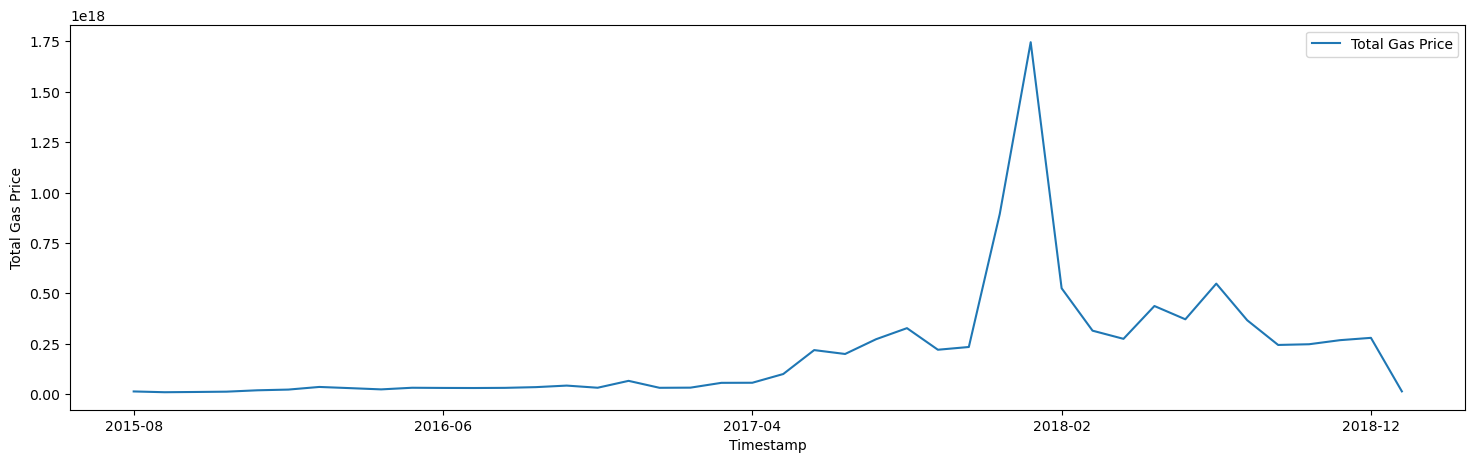

In [5]:
ax = df1.plot(x='Timestamp', y='Total Gas Price', figsize=(18,5))
ax.set_xlabel("Timestamp")
ax.set_ylabel("Total Gas Price")

Text(0, 0.5, 'Average Gas Price')

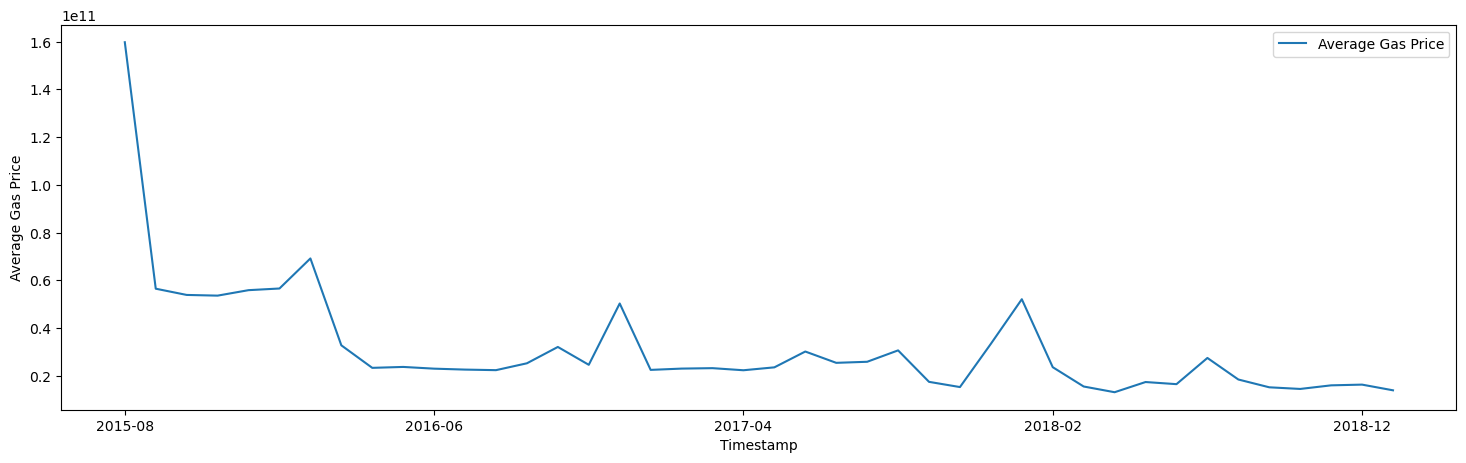

In [6]:
ax = df1.plot(x='Timestamp', y='Average Gas Price', figsize=(18,5))
ax.set_xlabel("Timestamp")
ax.set_ylabel("Average Gas Price")

# Plot of Average Gas used over time

In [7]:
list1=[]
with open("gas_used_over_time_final.txt") as my_file:
    for line in my_file:
        list1=line.split("',")
        break
from collections import defaultdict

dict1={}
dict1=defaultdict(list)
timestamp=set()
for l1 in list1:
    #print(l1)
    l2=l1.replace('[','').replace(']','').replace('(','').replace(')','').split(',')
    date=l2[0].replace("'",'').replace(" ",'').lower()
    date=datetime.strptime(date, '%Y-%m').strftime("%Y-%m")
    timestamp.add(date)
    total_ether=int(l2[1].replace("'",''))
    avg_ether=float(l2[2].replace("'",''))
    dict1[date]=[total_ether,avg_ether]

sorted_dict_items = sorted(dict1.items(), key=lambda x: x[0])
sorted_dict = {k: v for k, v in sorted_dict_items}    

list2=[]
for key,value in sorted_dict.items():
    list2.append([key,value[0],value[1]])
        

df1=pd.DataFrame(list2,columns=["Timestamp","Total Gas Used","Average Gas Used"])
#ax = df1.plot.bar(x='Date', y='Count', figsize=(18,5))


Text(0, 0.5, 'Total Gas Used')

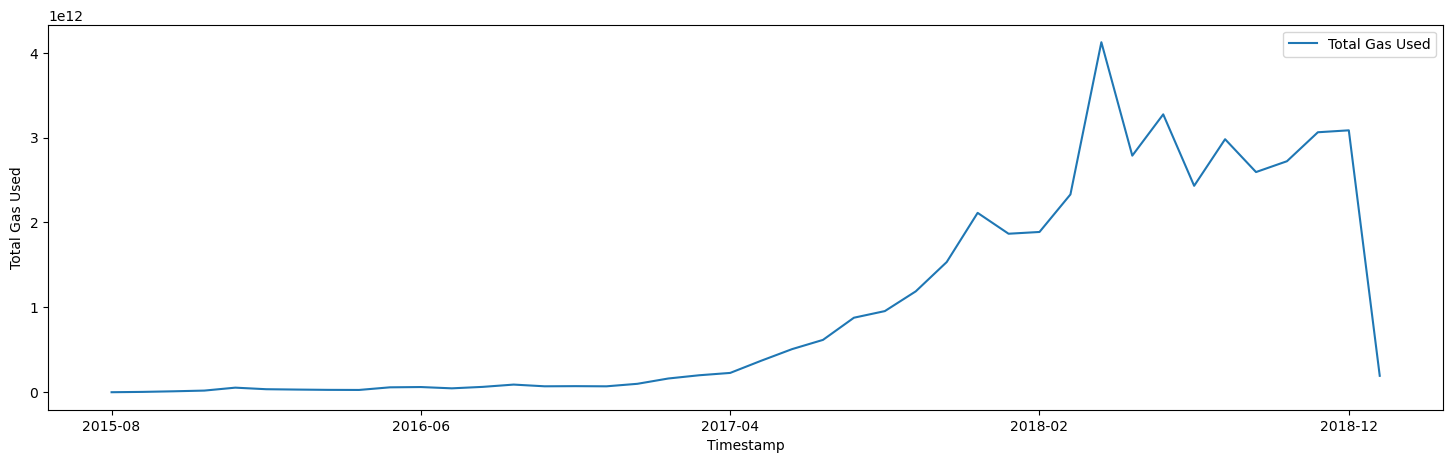

In [8]:
ax = df1.plot(x='Timestamp', y='Total Gas Used', figsize=(18,5))
ax.set_xlabel("Timestamp")
ax.set_ylabel("Total Gas Used")

Text(0, 0.5, 'Average Gas Used')

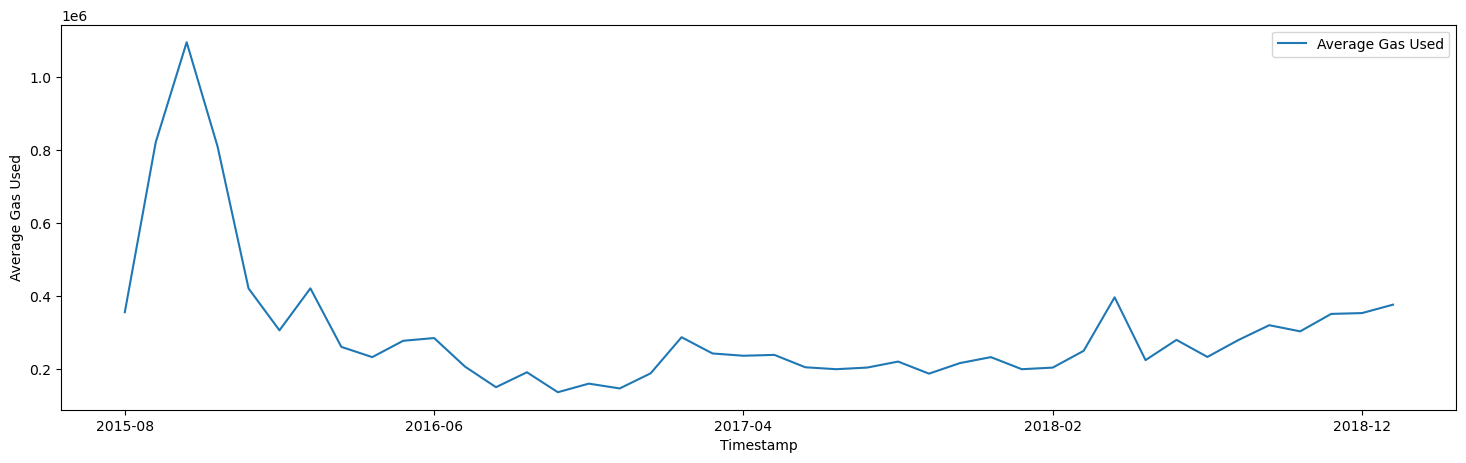

In [9]:
ax = df1.plot(x='Timestamp', y='Average Gas Used', figsize=(18,5))
ax.set_xlabel("Timestamp")
ax.set_ylabel("Average Gas Used")

# Analysis of average gas used by popular contracts 

In [53]:
list1=[]
with open("top10_smart_contracts.txt") as my_file:
    for line in my_file:
        list1=line.split("),")
        break

dict1={}
for l1 in list1:
    l2=l1.replace('[','').replace(']','').replace('(','').replace(')','').split(',')
    address=l2[0].replace("'",'').replace(" ",'').lower()
    ether_value=int(l2[1].replace("'",''))
    dict1[address]=ether_value

df1=pd.DataFrame(dict1.items(),columns=["Address","Ether Value"])

In [7]:
df1.head(10)

,Address,Ether Value
0,0xaa1a6e3e6ef20068f7f8d8c835d2d22fd5116444,84155363699941767867374641
1,0x7727e5113d1d161373623e5f49fd568b4f543a9e,45627128512915344587749920
2,0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef,42552989136413198919298969
3,0xfa52274dd61e1643d2205169732f29114bc240b3,40546128459947291326220872
4,0x6fc82a5fe25a5cdb58bc74600a40a69c065263f8,24543161734499779571163970
5,0xbfc39b6f805a9e40e77291aff27aee3c96915bdd,21104195138093660050000000
6,0xe94b04a0fed112f3664e45adb2b8915693dd5ff3,15543077635263742254719409
7,0xbb9bc244d798123fde783fcc1c72d3bb8c189413,11983608729102893846818681
8,0xabbb6bebfa05aa13e908eaa492bd7a8343760477,10719485945628946136524680
9,0x341e790174e3a4d35b65fdc067b6b5634a61caea,8379000751917755624057500


In [67]:
dict2={}
dict2=defaultdict(dict)
with open("gas_used_over_time_contracts (1).txt") as my_file:
    for line in my_file:
        l1=line.split(",")
        address=l1[0].replace("'",'').replace(" ",'').lower() 
        if address in dict1:
            avg_gas=float(l1[3].replace("'",'').replace('\n',''))
            date=l1[1].replace("'",'').replace(" ",'').lower()
            date=datetime.strptime(date, '%Y-%m').strftime("%Y-%m")
            dict2[address][date]=avg_gas


In [68]:
list2=[]
for key,value in dict2.items():
    sorted_dict_items = sorted(value.items(), key=lambda x: x[0])
    sorted_dict = {k: v for k, v in sorted_dict_items}
    for k,v in sorted_dict.items():
        list2.append([key,k,v])
        
df2=pd.DataFrame(list2,columns=["Address","Timestamp","Average Gas"])

In [69]:
df2.head(10)

,Address,Timestamp,Average Gas
0,0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef,2016-10,40007.263053
1,0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef,2016-11,40000.175360
2,0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef,2016-12,40000.244451
3,0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef,2017-01,40000.313322
4,0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef,2017-02,40000.147019
5,0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef,2017-03,40000.413706
6,0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef,2017-04,40000.268887
7,0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef,2017-05,40000.173275
8,0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef,2017-06,40001.817022
9,0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef,2017-07,47456.961950


In [103]:
avg_gas=161725.700

In [111]:
dict3={}
for key,value in dict2.items():
    avg=0
    len1=len(value)
    for k,v in value.items():
        avg+=v
    final_avg=avg/len1
    dict3[key]=final_avg
        

i1=set()
i2=set()

for key,value in dict3.items():
    if value>avg_gas:
        print("Contract {0} uses avg gas {1} which is more than total avg gas.".format(key,value))
        i1.add(key)
    else:
        print("Contract {0} uses avg gas {1} which is less than total avg gas.".format(key,value))
        i2.add(key)
        
    

print("\n{0} used more than total avg gas and {1} used less than total avg gas".format(len(i1),len(i2)))

Contract 0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef uses avg gas 46612.85479423437 which is less than total avg gas.
Contract 0xaa1a6e3e6ef20068f7f8d8c835d2d22fd5116444 uses avg gas 78833.76097923458 which is less than total avg gas.
Contract 0x6fc82a5fe25a5cdb58bc74600a40a69c065263f8 uses avg gas 47018.68060492709 which is less than total avg gas.
Contract 0xfa52274dd61e1643d2205169732f29114bc240b3 uses avg gas 35000.44812622792 which is less than total avg gas.
Contract 0xbb9bc244d798123fde783fcc1c72d3bb8c189413 uses avg gas 127439.98915603898 which is less than total avg gas.
Contract 0xe94b04a0fed112f3664e45adb2b8915693dd5ff3 uses avg gas 140225.74667965507 which is less than total avg gas.
Contract 0xabbb6bebfa05aa13e908eaa492bd7a8343760477 uses avg gas 96140.78875063571 which is less than total avg gas.
Contract 0x7727e5113d1d161373623e5f49fd568b4f543a9e uses avg gas 69169.21492813752 which is less than total avg gas.
Contract 0xbfc39b6f805a9e40e77291aff27aee3c96915bdd uses avg g

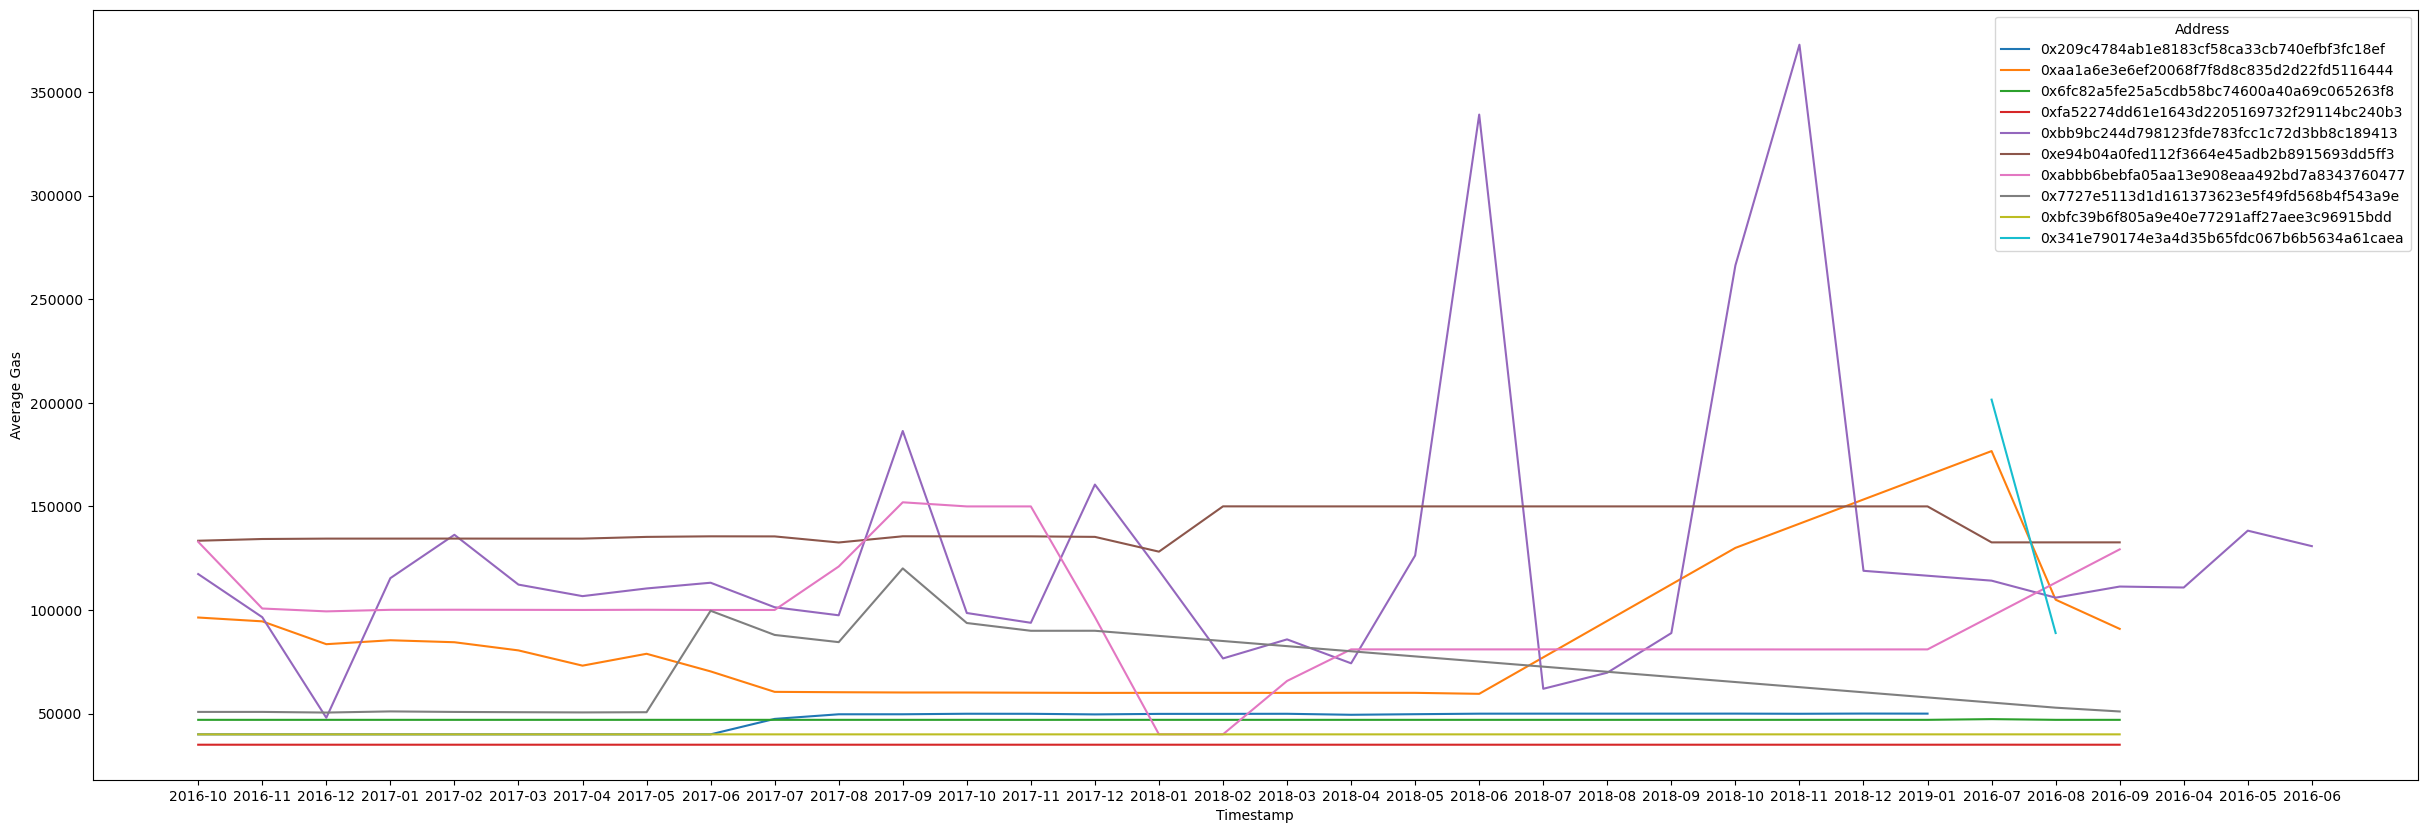

In [106]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.lineplot(data=df2, x="Timestamp", y='Average Gas', hue='Address')
plt.show()

Text(0, 0.5, 'Average Gas Used')

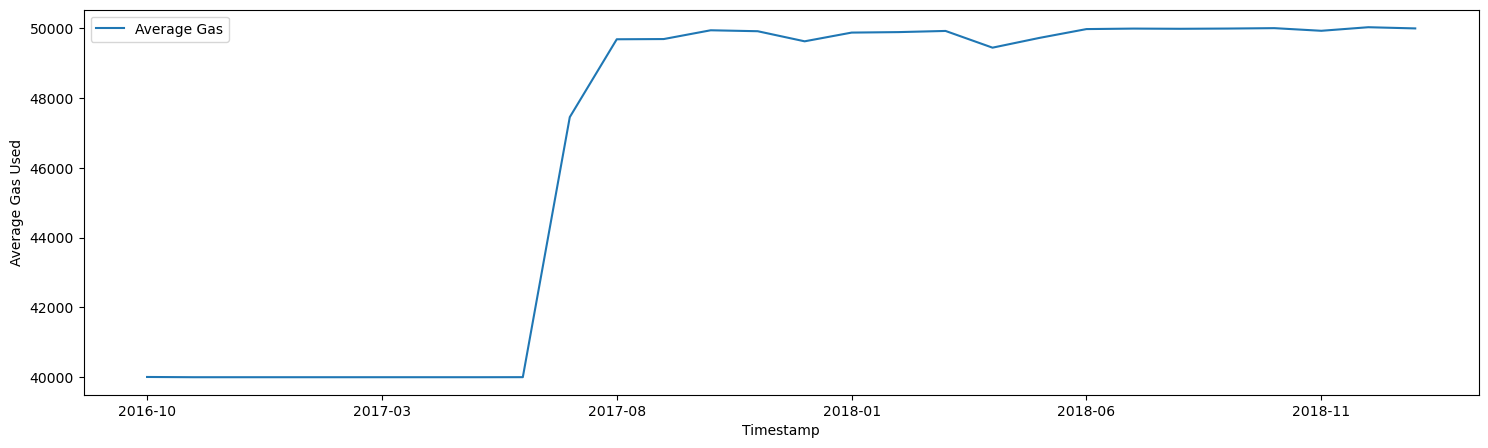

In [107]:
df3=df2[df2['Address']=='0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef'].iloc[:,[1,2]]
ax = df3.plot(x='Timestamp', y='Average Gas', figsize=(18,5))
ax.set_xlabel("Timestamp")
ax.set_ylabel("Average Gas Used")

Text(0, 0.5, 'Average Gas Used')

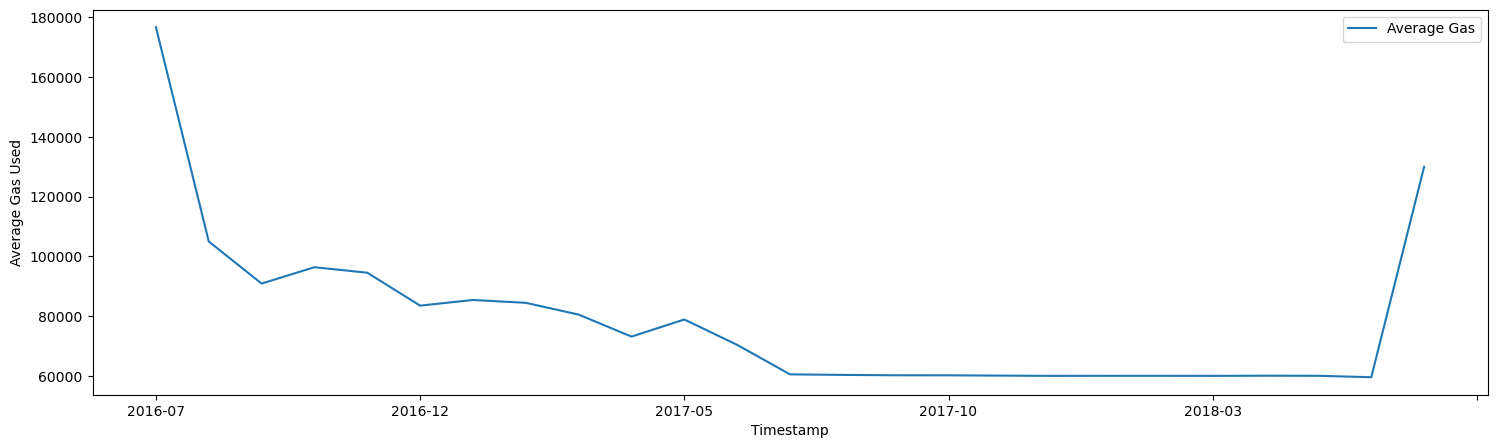

In [108]:
df3=df2[df2['Address']=='0xaa1a6e3e6ef20068f7f8d8c835d2d22fd5116444'].iloc[:,[1,2]]
ax = df3.plot(x='Timestamp', y='Average Gas', figsize=(18,5))
ax.set_xlabel("Timestamp")
ax.set_ylabel("Average Gas Used")

Text(0, 0.5, 'Average Gas Used')

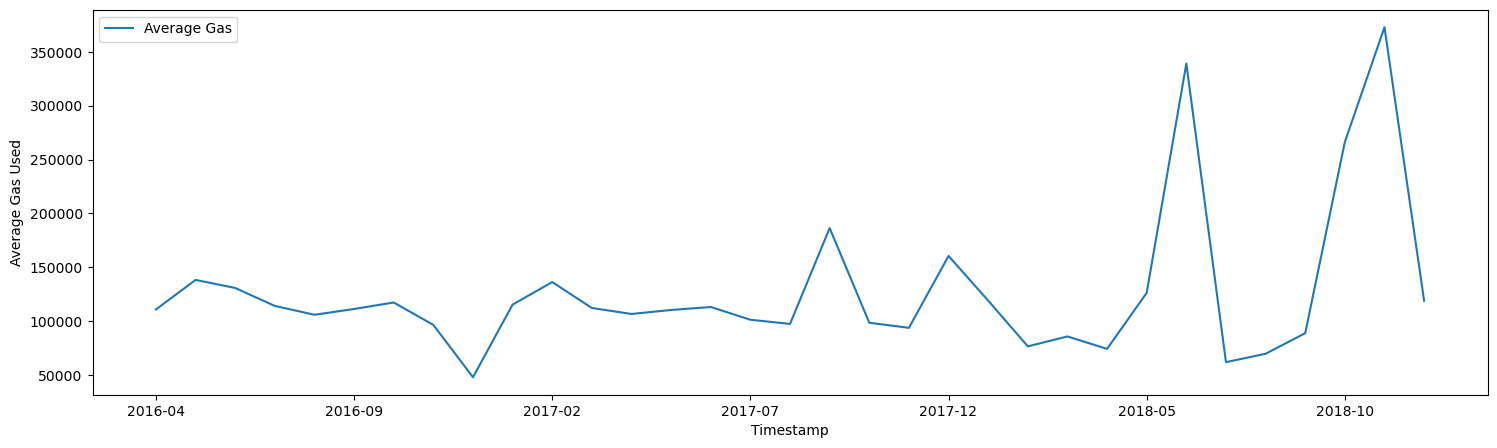

In [109]:
df3=df2[df2['Address']=='0xbb9bc244d798123fde783fcc1c72d3bb8c189413'].iloc[:,[1,2]]
ax = df3.plot(x='Timestamp', y='Average Gas', figsize=(18,5))
ax.set_xlabel("Timestamp")
ax.set_ylabel("Average Gas Used")